In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import pandas as pd

Loading the Data

In [ ]:
data=tf.keras.datasets.boston_housing.load_data()
(x_train,y_train),(x_test,y_test)=data


#x_train=tf.convert_to_tensor(x_train)
#y_train=tf.convert_to_tensor(y_train)
print(x_train.shape,y_train.shape)

(404, 13) (404,)


Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# first we fit the scaler on the training dataset
scaler.fit(x_train)

# then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

# a sample output
print(X_train_scaled[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


__NN__

In [ ]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[x_train.shape[1]]))
model.add(layers.Dense(16, activation='relu'))

# output layer
model.add(layers.Dense(1))

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
11/11 [==============================] - 1s 27ms/step - loss: 551.4766 - mae: 21.6653 - val_loss: 618.5724 - val_mae: 23.1497
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 539.0127 - mae: 21.3777 - val_loss: 606.7040 - val_mae: 22.9000
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 526.5080 - mae: 21.0960 - val_loss: 594.6808 - val_mae: 22.6381
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 513.6097 - mae: 20.7937 - val_loss: 581.8411 - val_mae: 22.3554
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 499.7379 - mae: 20.4650 - val_loss: 568.1548 - val_mae: 22.0464
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 484.7613 - mae: 20.1096 - val_loss: 551.9755 - val_mae: 21.6815
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 468.0518 - mae: 19.7069 - val_loss: 534.6478 - val_mae: 21.2851
Epoch 8/100
11/11 [=====================

In [ ]:
model.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 23.1194 - mae: 3.5129


[23.11939239501953, 3.512904644012451]

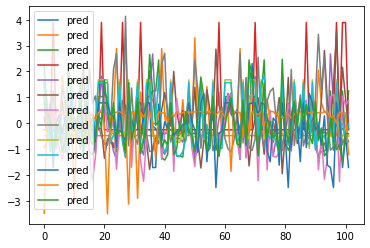

In [ ]:
plt.plot(X_test_scaled,label='pred')
#plt.plot(y_test,label='test')
plt.legend()
plt.show()

Sklearn#########################################################################

In [ ]:
from sklearn import linear_model

In [ ]:
reg=linear_model.LinearRegression()

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(reg.coef_)

[-1.19997513e-01  5.70003304e-02  3.98379660e-03  4.12698187e+00
 -2.05002963e+01  3.38024903e+00  7.56807584e-03 -1.71189793e+00
  3.34747537e-01 -1.17797225e-02 -9.02318039e-01  8.71912756e-03
 -5.55842510e-01]


In [ ]:
y_pred=reg.predict(x_test)
y_pred

array([ 9.69267239, 21.05859431, 20.94145461, 34.25223414, 25.95902598,
       20.56741038, 28.15310405, 25.07113862, 20.30519458, 22.82489511,
       20.29027213, 18.07938917, 16.46141024, 35.31166595, 19.41369959,
       19.34727116, 24.58140904, 21.01346252, 19.99079236, 23.79286427,
       12.20780045, 17.14218992, 22.51468752, 12.92570511, 21.18070615,
       23.94073547, 33.46176314, 24.2631555 , 13.35213096, 20.71939252,
       23.45082103, 19.1486881 , 36.09743765, 23.47113531, 19.03141995,
        5.92425733, 14.02090469, 22.96425377, 16.01731242, 27.09134249,
       22.06997029, 28.61755389, 17.75679772, 34.75579014, 31.29455712,
       24.73234165, 31.12655323, 18.09268992, 22.62638989, 24.21208909,
       30.5854317 , 18.71860574, 10.50163617, 13.73779292, 34.4022841 ,
       27.53140317, 18.08151522, 40.05101982, 37.63271513, 24.64021422,
       25.73823434, 20.64369987, 20.33514699, 21.38393124, 24.63485497,
       23.53071805, 17.42141466, 26.76911736,  3.83782148, 11.97

In [ ]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

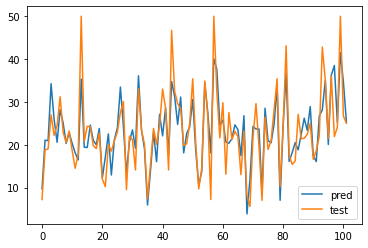

In [ ]:
plt.plot(y_pred,label='pred')
plt.plot(y_test,label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7213535934621562

In [ ]:
(X,Y),(x,y)=tf.keras.datasets.boston_housing.load_data()#data.load_data()
X.shape


(404, 13)

In [ ]:

X= tf.cast(X, tf.float32)
Y= tf.cast(Y, tf.float32)
x= tf.cast(x, tf.float32)
y= tf.cast(y, tf.float32)
#X=tf.cast(X_train_scaled, tf.float32)
#x=tf.cast(X_test_scaled,tf.float32)
#print(X.dtype,Y.dtype,x.dtype,y.dtype)
#print(X_train_scaled.dtype)


In [ ]:
class linear_reg:
  
  def __init__(self):
    self.w = tf.Variable(tf.ones((13,1)),dtype=tf.float32)
    self.b = tf.Variable(tf.ones(1))
    self.lr = 0.1
    self.optimizer=tf.optimizers.Adam(self.lr)

  def predict(self,data):
    return tf.matmul(data,self.w) + self.b
  

  def train(self,x,y,val_x,val_y,epochs = 200):
    @tf.function
    def update(data,label):
        cost=lambda :tf.reduce_sum((self.predict(data)-label)**2)/1000000
        self.optimizer.minimize(cost,[self.w,self.b])

    losses = []
    while epochs:
      update(X,Y)
      if(epochs%20):
        pred=self.predict(X)

        print("\rloss {}".format(tf.reduce_sum((pred-Y)**2)/1000000),end='')
      
      epochs-=1
      

  def plot(self,x,y,val_x,val_y):
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

    # ax.scatter(x[:,0],x[:,1],y,c = 'red',label = 'ground_truth')
    # pred = self.predict(x)

    # ax.scatter(x[:,0],x[:,1],pred,c = 'blue',label = 'predictions')
    # ax.legend()
    # plt.show()

    ax.scatter(x[:,0],x[:,1],y,c = 'red',label = 'ground_truth')
    pred = self.predict(x)

    ax.scatter(x[:,0],x[:,1],pred,c = 'blue',label = 'predictions')
    ax.legend()
    plt.show()



In [ ]:
X[0]

<tf.Tensor: shape=(13,), dtype=float32, numpy=
array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ], dtype=float32)>

In [ ]:
model = linear_reg()
X__ = tf.cast(X, tf.float32)
tf.matmul(X__, model.w) + model.b

<tf.Tensor: shape=(404, 1), dtype=float32, numpy=
array([[ 860.34937],
       [ 878.73676],
       [1219.9117 ],
       [ 707.37695],
       [1237.1293 ],
       [ 808.356  ],
       [1266.8033 ],
       [ 978.4482 ],
       [ 739.37067],
       [1025.1111 ],
       [1244.0518 ],
       [ 918.04987],
       [ 831.55725],
       [1198.3933 ],
       [ 726.2386 ],
       [ 948.3427 ],
       [1238.1981 ],
       [ 858.9874 ],
       [ 902.7115 ],
       [ 913.71344],
       [ 887.74585],
       [ 786.4517 ],
       [ 937.32916],
       [ 811.8993 ],
       [ 732.4154 ],
       [1264.8865 ],
       [ 839.3848 ],
       [ 740.4784 ],
       [ 834.8349 ],
       [ 919.9917 ],
       [ 838.6031 ],
       [1237.9285 ],
       [1118.9894 ],
       [ 775.89557],
       [ 778.5366 ],
       [ 775.0702 ],
       [ 758.20215],
       [ 824.43787],
       [ 786.08624],
       [ 906.52966],
       [1277.7247 ],
       [ 682.7492 ],
       [ 702.2202 ],
       [1183.1453 ],
       [1258.9719 ],
     

In [ ]:

model=linear_reg()
model.train(X,Y,x,y,1500)

loss 14.120896339416504

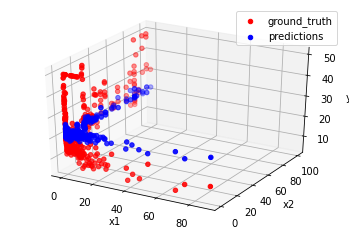

In [ ]:
model.plot(X,Y,x,y)

In [ ]:
from sklearn.metrics import r2_score
pred=model.predict(x)
r2_score(y,pred)

-0.15832907140749297